# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [8]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [11]:
# Load the dataset
df = pd.read_csv('Employee_data.csv')

In [12]:
# Check the first few entries
df.head(5)

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [13]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [14]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [16]:
# Check the summary of the dataset
df.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74610.000000  74610.000000      74610.000000    74610.000000   
mean   37246.028696     38.529379         15.722638     7344.931417   
std    21505.785344     12.082299         11.224059     2596.373589   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18624.250000     28.000000          7.000000     5652.000000   
50%    37239.500000     39.000000         13.000000     7348.500000   
75%    55871.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    50030.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74610.000000        72698.000000          74610.000000   
mean               0.832958           49.990839              1.657432   
std                0.995326           28.519135              1.579862   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000             15.000000   

       Company Tenure (In Months)  
count                72197.000000  
mean                    55.711899  
std                     25.392325  
min                      2.000000  
25%                     36.000000  
50%                     56.000000  
75%                     76.000000  
max                    128.000000

### **1.3 Check the data type of columns**

In [18]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [22]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [24]:
# Check the percentage of missing values in each column
df.isnull().sum() / df.shape[0] * 100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [26]:
# Handle the missing value rows in the column
# Company Tenure
median_tenure = df['Company Tenure (In Months)'].median()
df['Company Tenure (In Months)'].fillna(median_tenure, inplace=True)

# Distance from Home
median_dist = df['Distance from Home'].median()
df['Distance from Home'].fillna(median_dist, inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [28]:
# Check the percentage of remaining data after missing values are removed
df.isnull().sum() / df.shape[0] * 100

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [31]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def categorical_columns(df):
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Column: {column}")
        print(f"Unique values: {df[column].unique()}")
        print(df[column].value_counts(dropna=False))
        print("==="*20)

In [32]:
# Check the data
categorical_columns(df)

Column: Gender
Unique values: ['Male' 'Female']
Gender
Male      40898
Female    33712
Name: count, dtype: int64
Column: Job Role
Unique values: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Job Role
Technology    19350
Healthcare    17107
Education     15679
Media         12011
Finance       10463
Name: count, dtype: int64
Column: Work-Life Balance
Unique values: ['Excellent' 'Poor' 'Good' 'Fair']
Work-Life Balance
Good         28196
Fair         22569
Excellent    13451
Poor         10394
Name: count, dtype: int64
Column: Job Satisfaction
Unique values: ['Medium' 'High' 'Very High' 'Low']
Job Satisfaction
High         37306
Very High    15101
Medium       14738
Low           7465
Name: count, dtype: int64
Column: Performance Rating
Unique values: ['Average' 'Low' 'High' 'Below Average']
Performance Rating
Average          44786
High             14938
Below Average    11150
Low               3736
Name: count, dtype: int64
Column: Overtime
Unique values: ['No' 'Yes']
Overti

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [34]:
# Drop redundant columns which are not required for modelling
# No such redundant columns are found in the dataset but Employee_ID and Gender is not needed for modelling
df = df.drop(['Employee ID','Gender'], axis=1)

In [35]:
# Check first few rows of data
df.head()

Age  Years at Company    Job Role  Monthly Income Work-Life Balance  \
0   31                19   Education            5390         Excellent   
1   59                 4       Media            5534              Poor   
2   24                10  Healthcare            8159              Good   
3   36                 7   Education            3989              Good   
4   56                41   Education            4821              Fair   

  Job Satisfaction Performance Rating  Number of Promotions Overtime  \
0           Medium            Average                     2       No   
1             High                Low                     3       No   
2             High                Low                     0       No   
3             High               High                     1       No   
4        Very High            Average                     0      Yes   

   Distance from Home  ... Number of Dependents Job Level  Company Size  \
0                22.0  ...                    0       Mid        Medium   
1                21.0  ...                    3       Mid        Medium   
2                11.0  ...                    3       Mid        Medium   
3                27.0  ...                    2       Mid         Small   
4                71.0  ...                    0    Senior        Medium   

  Company Tenure (In Months) Remote Work  Leadership Opportunities  \
0                       89.0          No                        No   
1                       21.0          No                        No   
2                       74.0          No                        No   
3                       50.0         Yes                        No   
4                       68.0          No                        No   

  Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                       No          Excellent               Medium    Stayed  
1                       No               Fair                  Low    Stayed  
2                       No               Poor                  Low    Stayed  
3                       No               Good               Medium    Stayed  
4                       No               Fair               Medium    Stayed  

[5 rows x 22 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [38]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [40]:
# Put all the feature variables in X
X = df.drop(['Attrition'], axis=1)
# Put the target variable in y
y = df['Attrition']

In [41]:
X

Age  Years at Company    Job Role  Monthly Income Work-Life Balance  \
0       31                19   Education            5390         Excellent   
1       59                 4       Media            5534              Poor   
2       24                10  Healthcare            8159              Good   
3       36                 7   Education            3989              Good   
4       56                41   Education            4821              Fair   
...    ...               ...         ...             ...               ...   
74605   44                20  Healthcare            7578              Fair   
74606   45                26  Technology            8342         Excellent   
74607   28                 3  Technology            9763              Poor   
74608   37                 3   Education            3644              Fair   
74609   38                28       Media            6172              Good   

      Job Satisfaction Performance Rating  Number of Promotions Overtime  \
0               Medium            Average                     2       No   
1                 High                Low                     3       No   
2                 High                Low                     0       No   
3                 High               High                     1       No   
4            Very High            Average                     0      Yes   
...                ...                ...                   ...      ...   
74605           Medium                Low                     2       No   
74606        Very High      Below Average                     3       No   
74607              Low            Average                     0       No   
74608             High            Average                     2       No   
74609             High               High                     0       No   

       Distance from Home  ... Marital Status Number of Dependents  Job Level  \
0                    22.0  ...        Married                    0        Mid   
1                    21.0  ...       Divorced                    3        Mid   
2                    11.0  ...        Married                    3        Mid   
3                    27.0  ...         Single                    2        Mid   
4                    71.0  ...       Divorced                    0     Senior   
...                   ...  ...            ...                  ...        ...   
74605                25.0  ...         Single                    3        Mid   
74606                27.0  ...         Single                    4        Mid   
74607                45.0  ...         Single                    3     Senior   
74608                16.0  ...         Single                    4      Entry   
74609                43.0  ...        Married                    2        Mid   

      Company Size Company Tenure (In Months)  Remote Work  \
0           Medium                       89.0           No   
1           Medium                       21.0           No   
2           Medium                       74.0           No   
3            Small                       50.0          Yes   
4           Medium                       68.0           No   
...            ...                        ...          ...   
74605        Large                       52.0           No   
74606       Medium                       56.0          Yes   
74607        Small                       67.0           No   
74608       Medium                       16.0           No   
74609       Medium                       84.0           No   

      Leadership Opportunities Innovation Opportunities Company Reputation  \
0                           No                       No          Excellent   
1                           No                       No               Fair   
2                           No                       No               Poor   
3                           No                       No               Good   
4                           No                   

In [42]:
y

0        Stayed
1        Stayed
2        Stayed
3        Stayed
4        Stayed
          ...  
74605      Left
74606    Stayed
74607      Left
74608    Stayed
74609    Stayed
Name: Attrition, Length: 74610, dtype: object

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [44]:
# Split the data into 70% train data and 30% validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
train_X.shape

(52227, 21)

In [46]:
val_X.shape

(22383, 21)

In [47]:
train_y.shape

(52227,)

In [48]:
val_y.shape

(22383,)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [53]:
# Select numerical columns
train_X_numerical = train_X[df.select_dtypes(include = ['int64']).columns]
train_X_numerical.shape

(52227, 5)

In [54]:
train_X_numerical.head(3)

Age  Years at Company  Monthly Income  Number of Promotions  \
67016   23                 3            7050                     0   
9437    57                12            8429                     0   
52439   34                24            7338                     1   

       Number of Dependents  
67016                     3  
9437                      4  
52439                     1

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [56]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


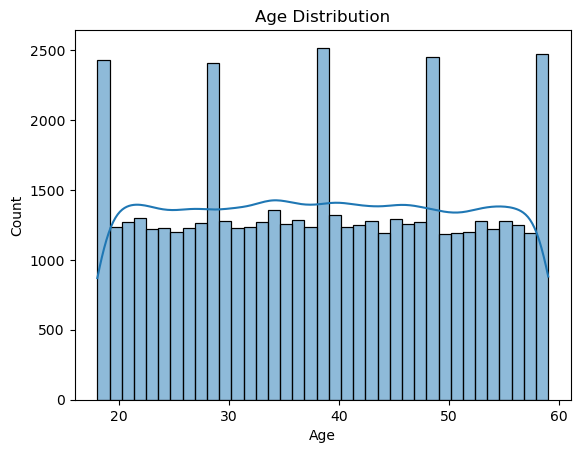

In [57]:
sns.histplot(train_X_numerical['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

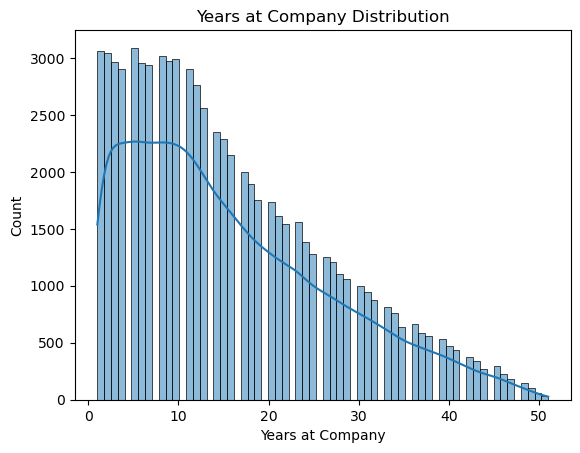

In [58]:
sns.histplot(df['Years at Company'], kde=True)
plt.title('Years at Company Distribution')
plt.show()

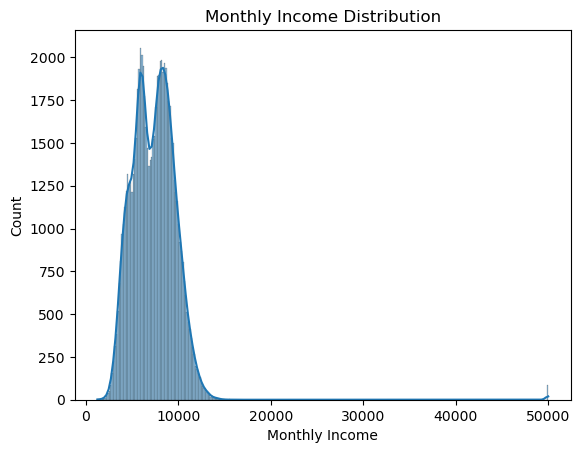

In [59]:
sns.histplot(df['Monthly Income'], kde=True)
plt.title('Monthly Income Distribution')
plt.show()

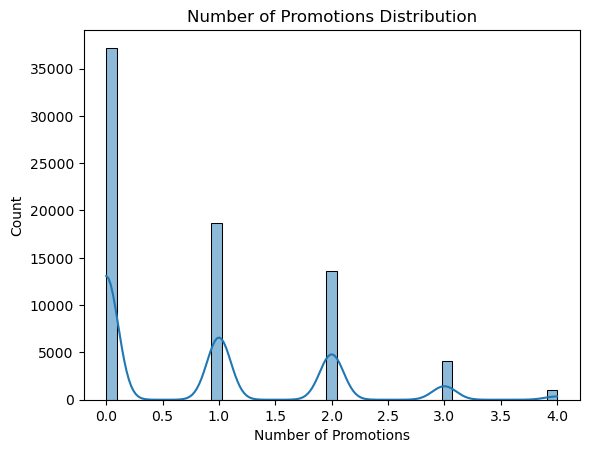

In [60]:
sns.histplot(df['Number of Promotions'], kde=True)
plt.title('Number of Promotions Distribution')
plt.show()

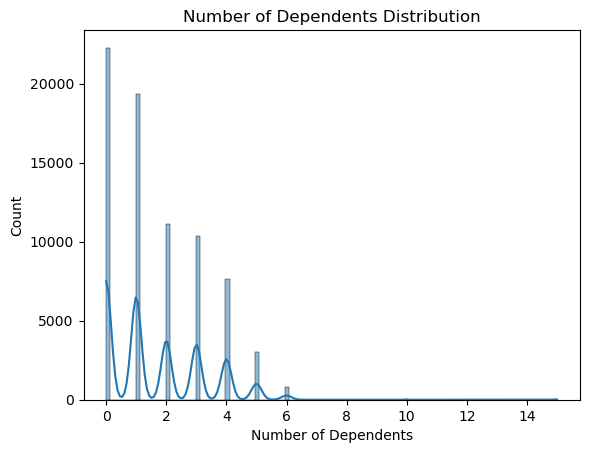

In [61]:
sns.histplot(df['Number of Dependents'], kde=True)
plt.title('Number of Dependents Distribution')
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

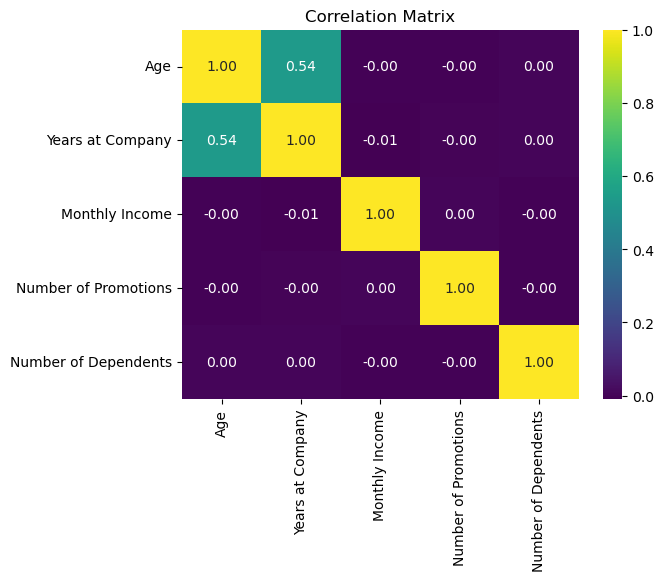

In [64]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix
sns.heatmap(train_X_numerical.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

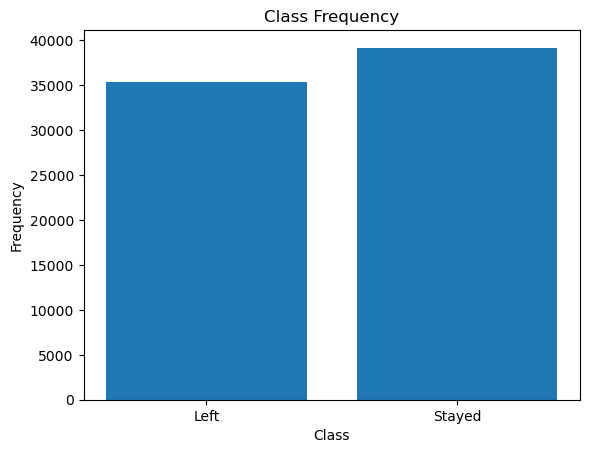

In [67]:
# Plot a bar chart to check class balance
classes = df['Attrition'].values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

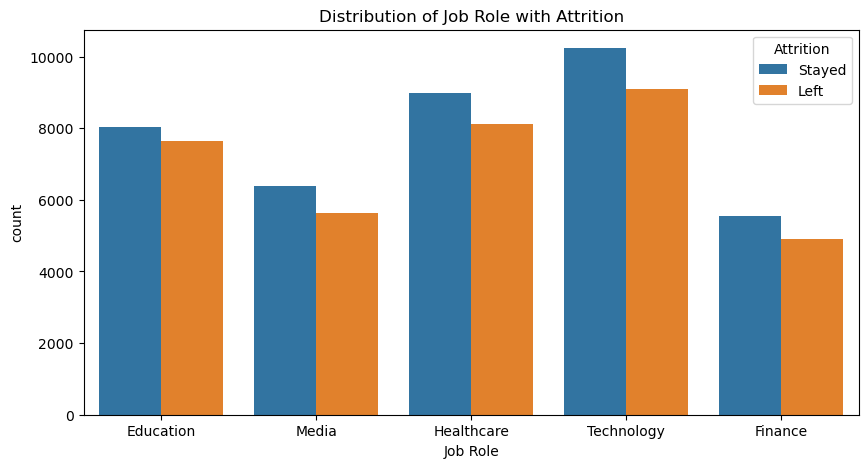

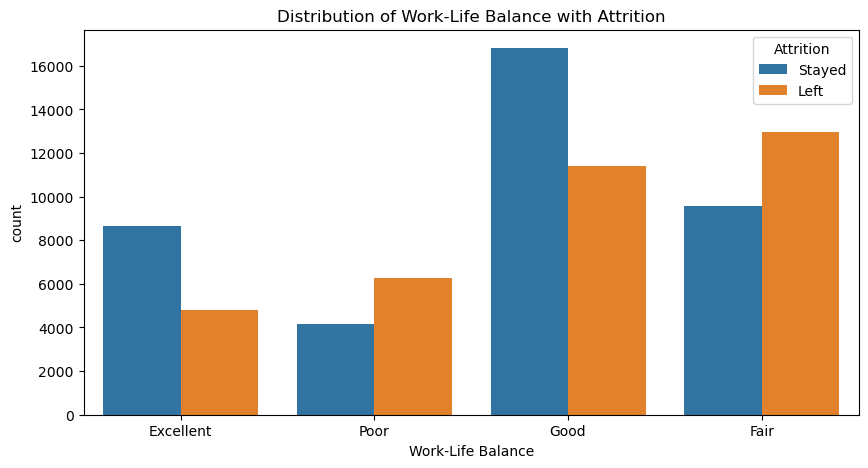

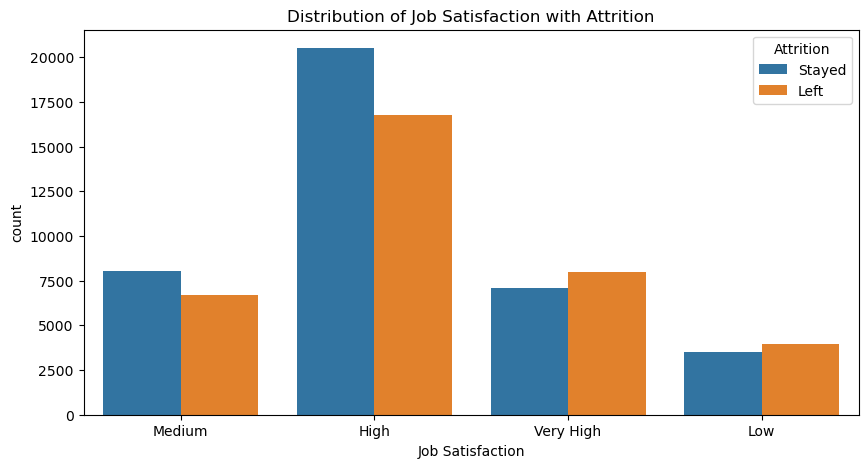

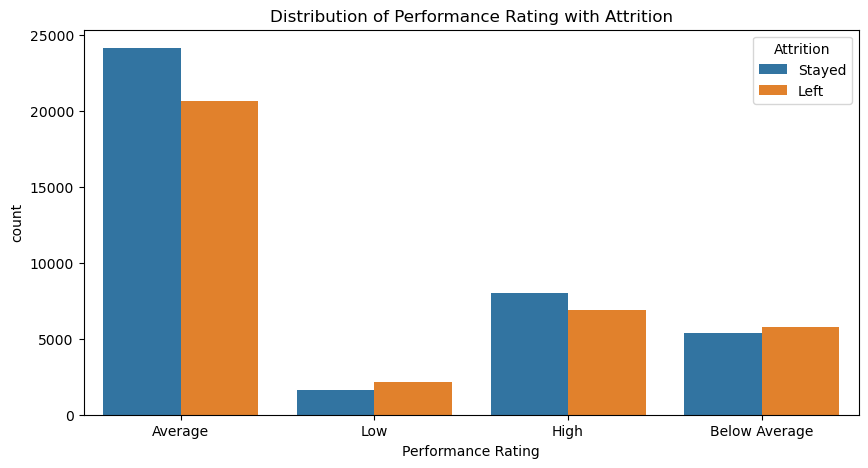

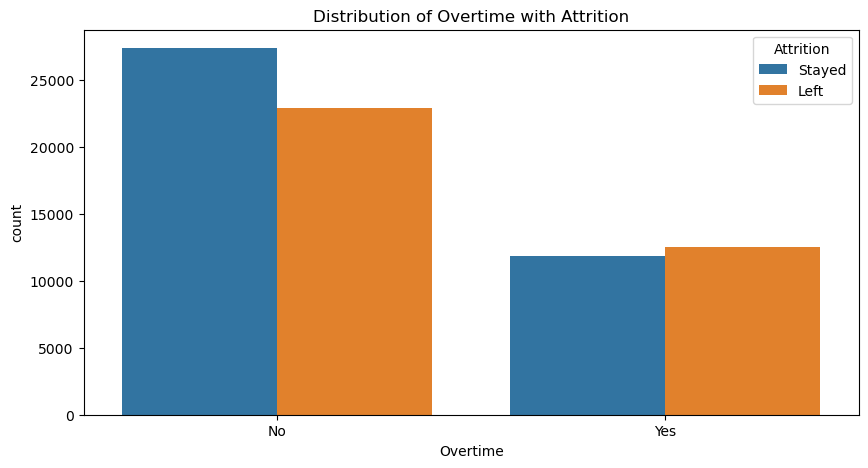

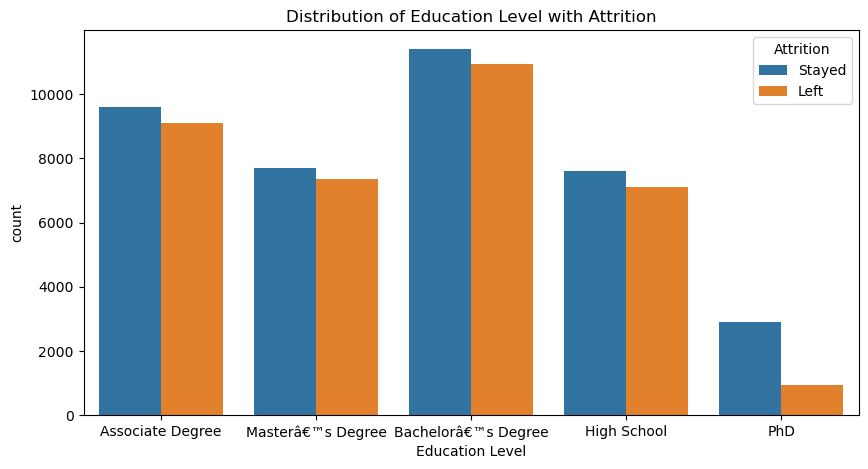

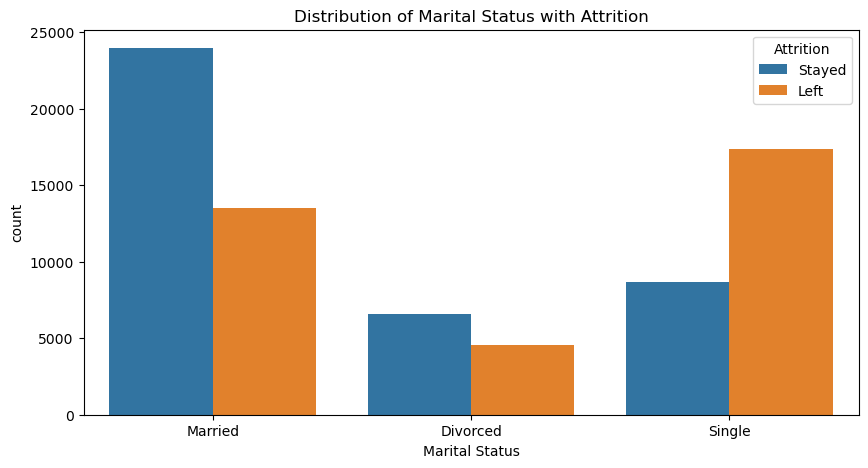

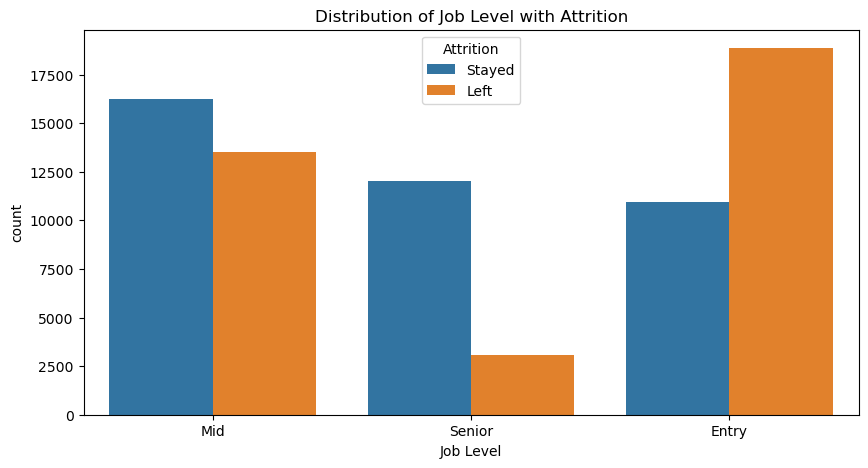

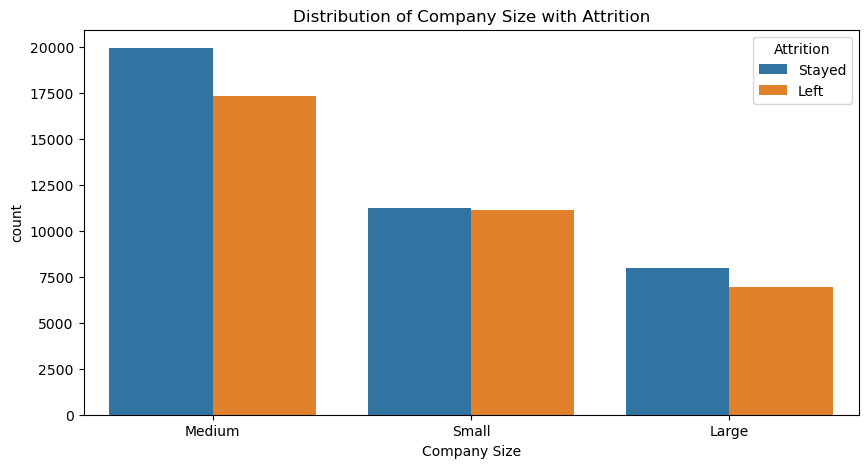

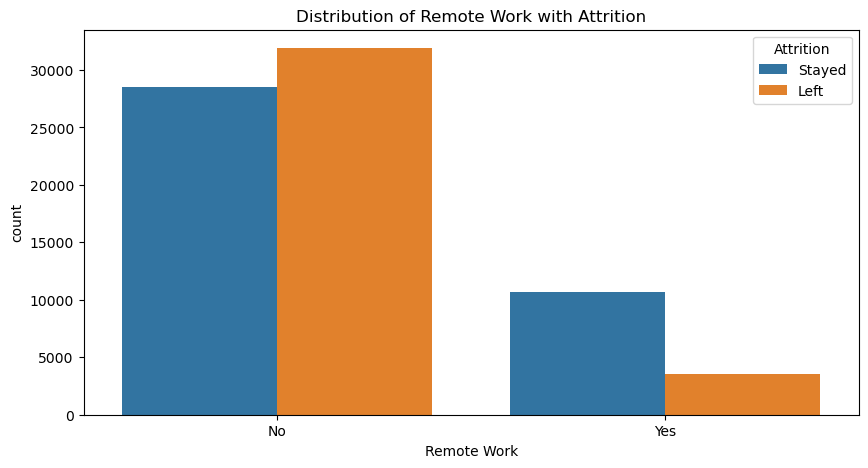

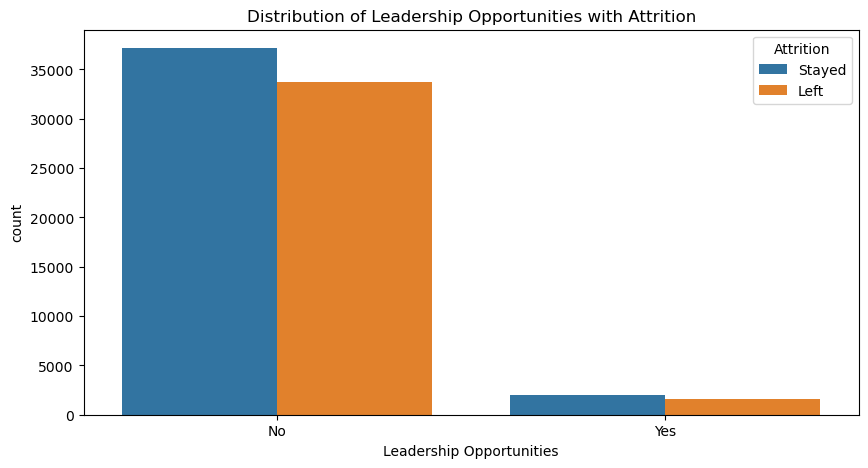

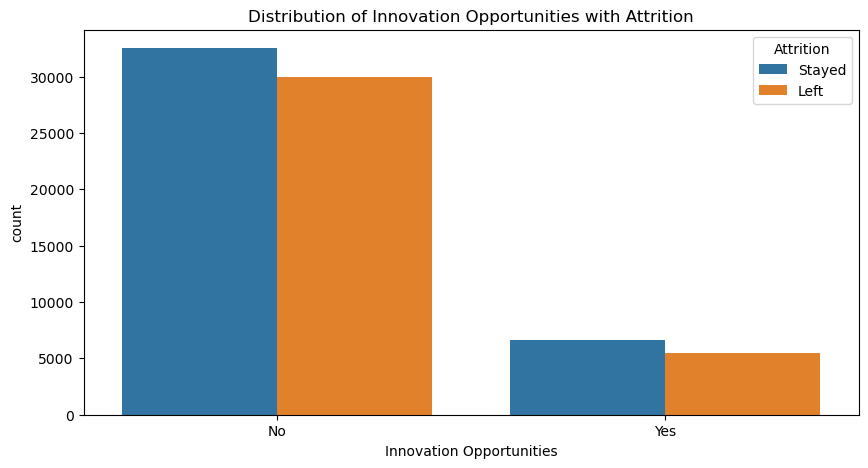

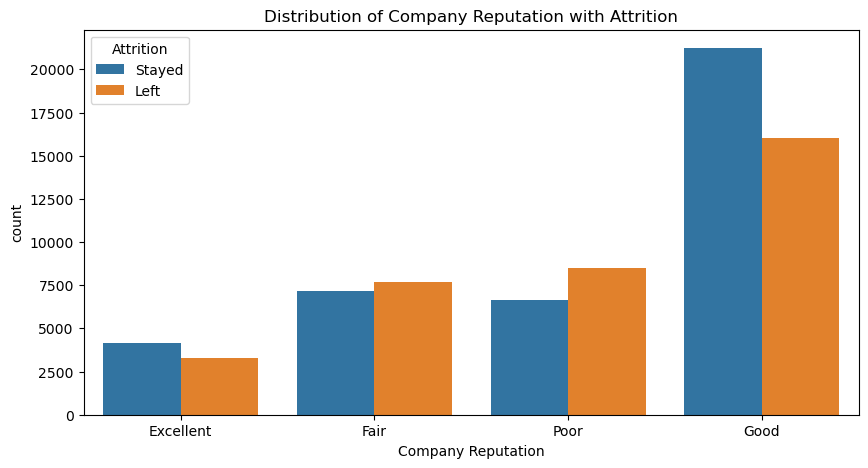

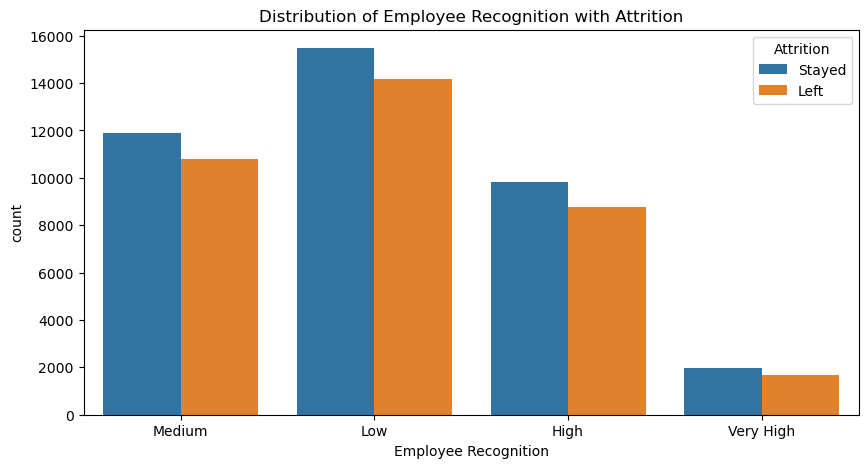

In [70]:
# Plot distribution for each categorical column with target variable
for column in train_X.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='Attrition', data=df)
    plt.title(f'Distribution of {column} with Attrition')
    plt.show()
     

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [75]:
# Select numerical columns
val_X_numeric = val_X.select_dtypes(include = ['int64']).columns

5.1.2 Plot distribution of numerical columns

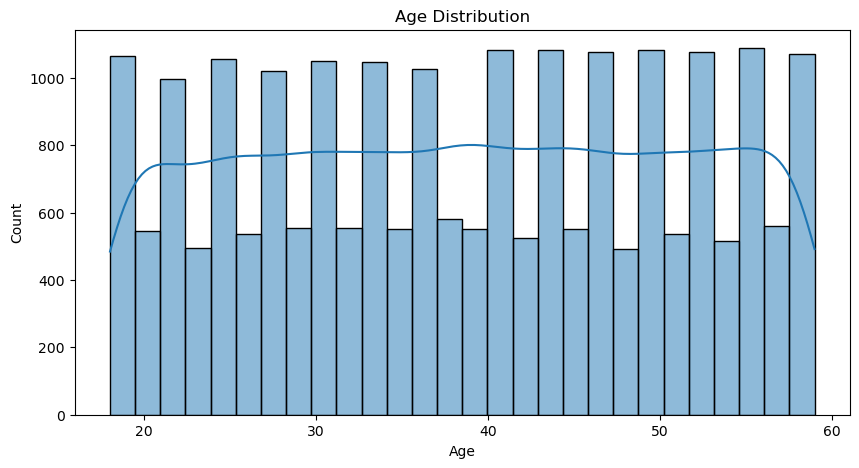

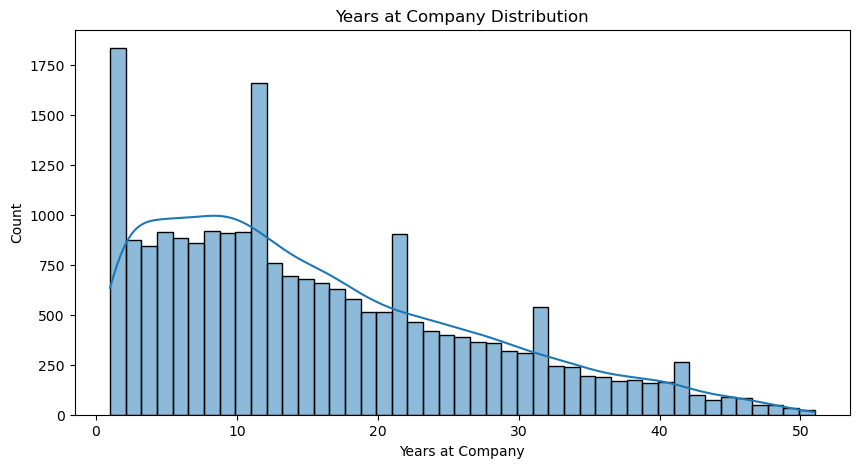

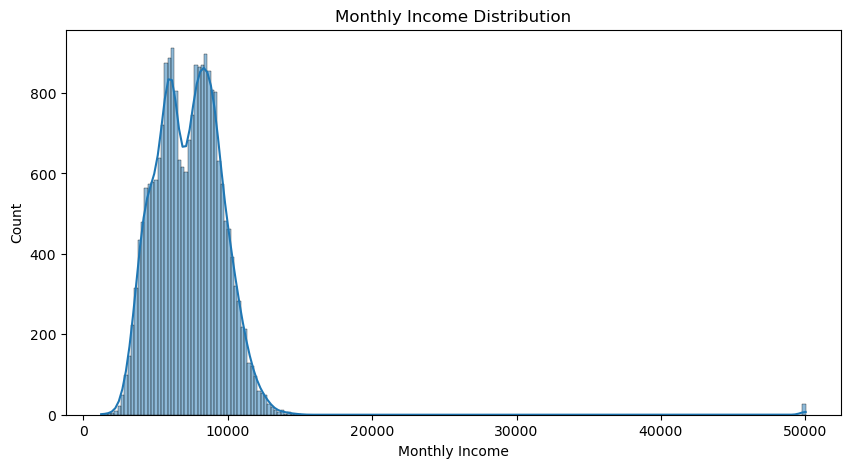

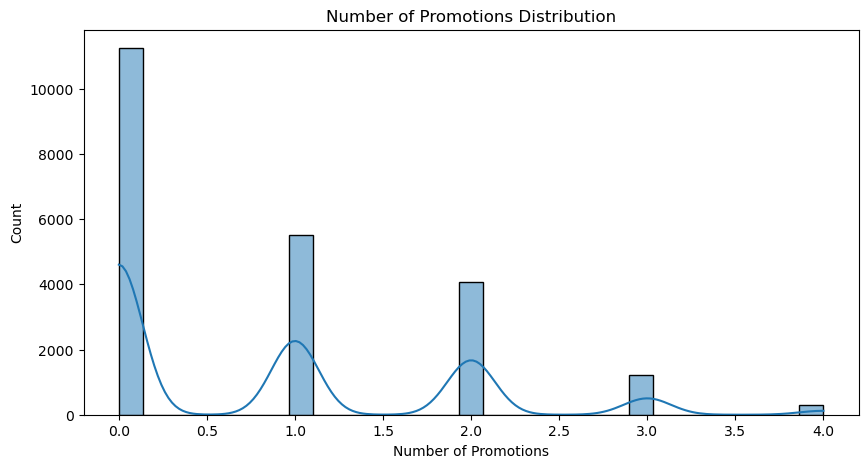

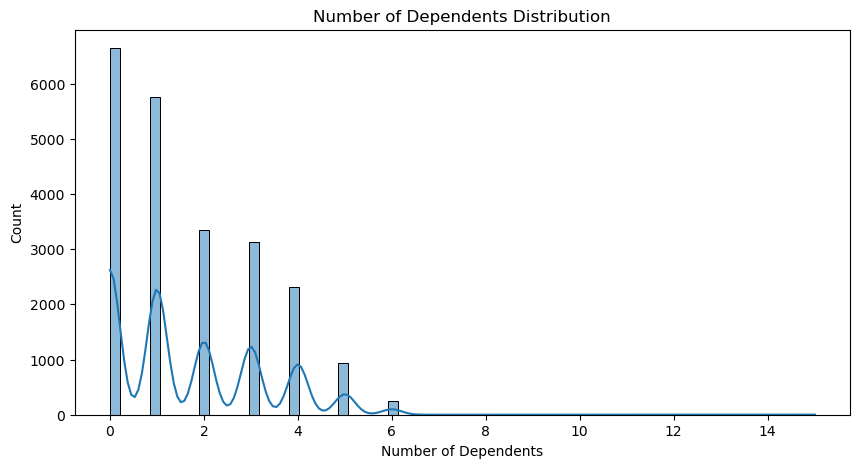

In [77]:
# Plot all the numerical columns to understand their distribution
for column in val_X_numeric:
    plt.figure(figsize=(10, 5))
    sns.histplot(val_X[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

Text(0.5, 1.0, 'Correlation Matrix')

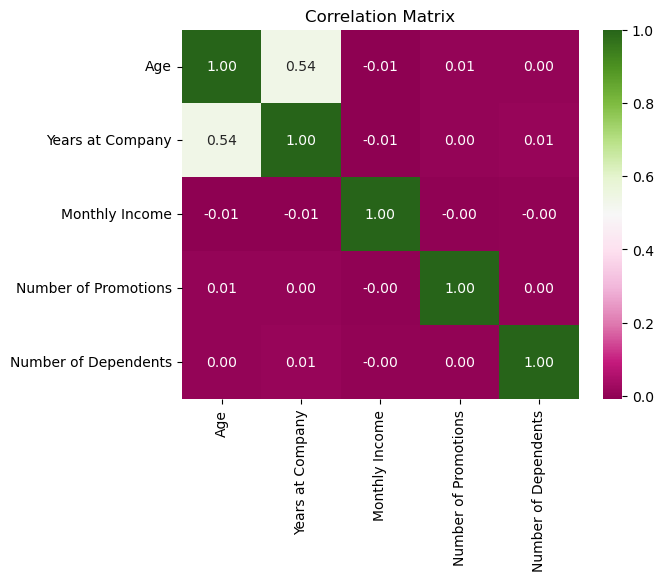

In [80]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix
sns.heatmap(val_X[val_X_numeric].corr(), annot=True, cmap='PiYG', fmt='.2f')
plt.title('Correlation Matrix')

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

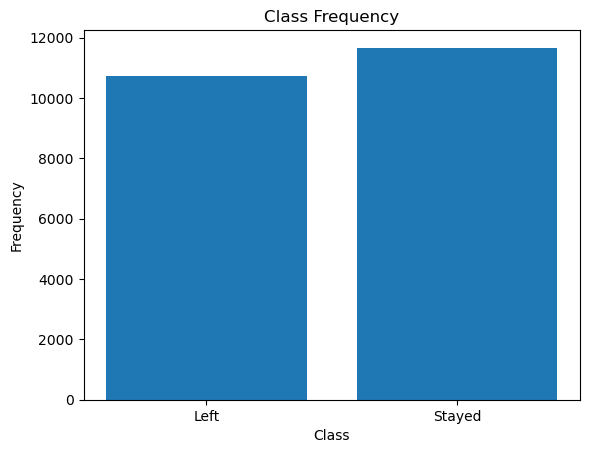

In [83]:
# Plot a bar chart to check class balance
classes = val_y.values
unique, counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

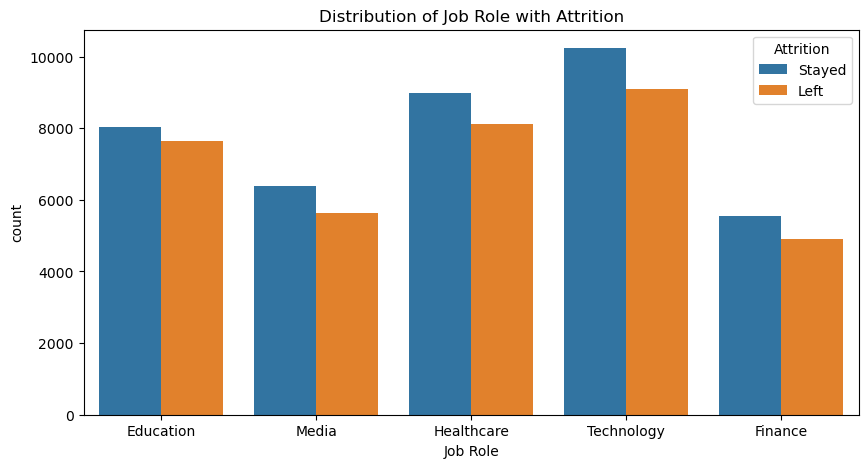

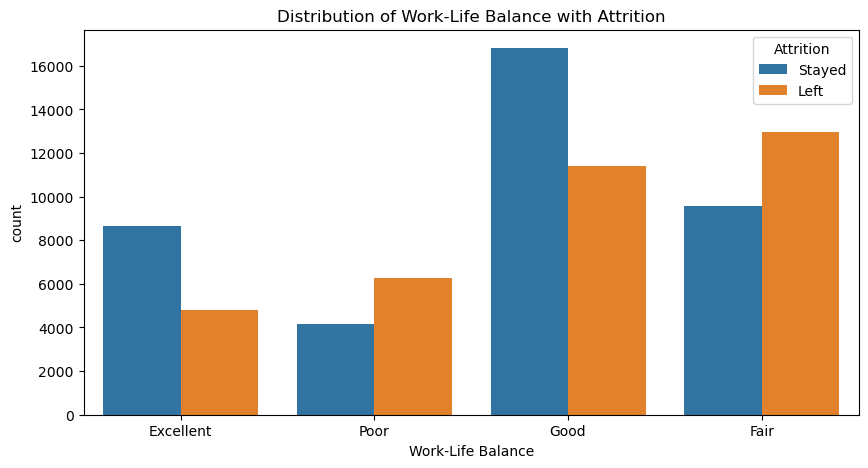

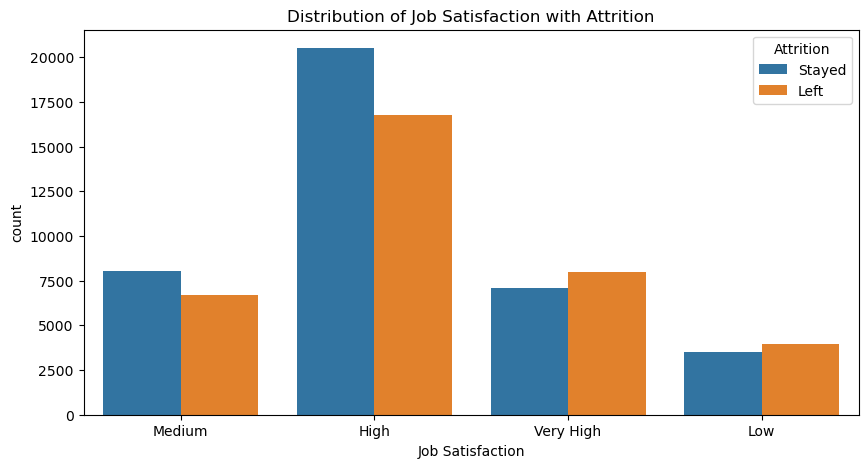

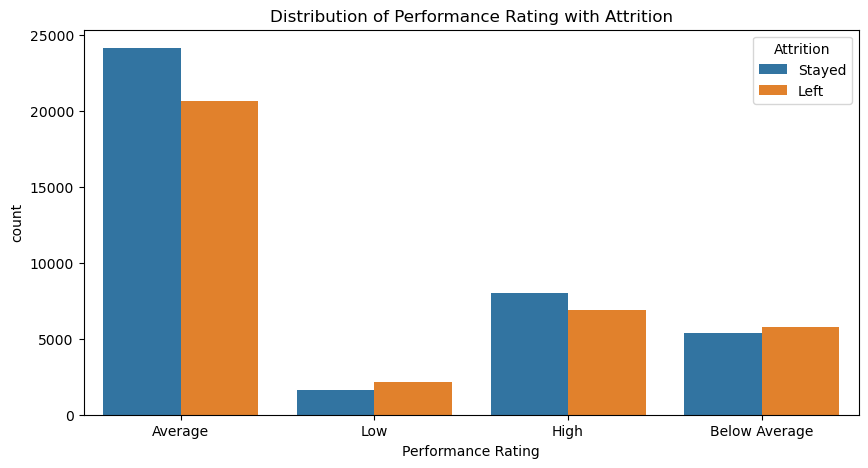

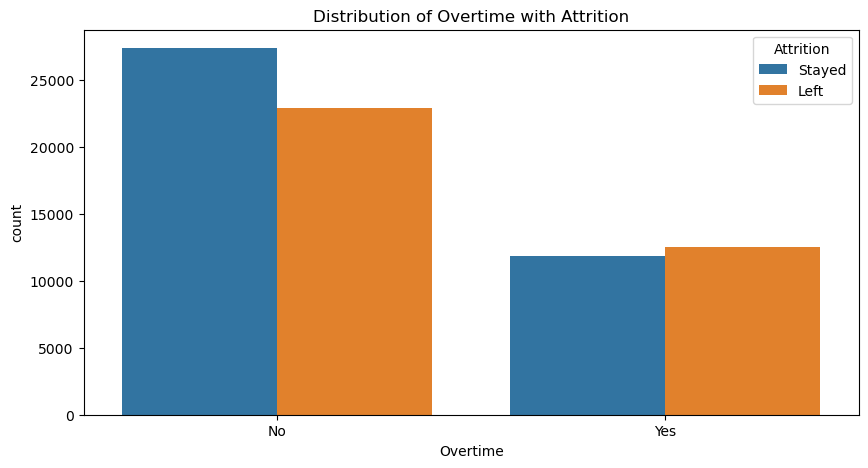

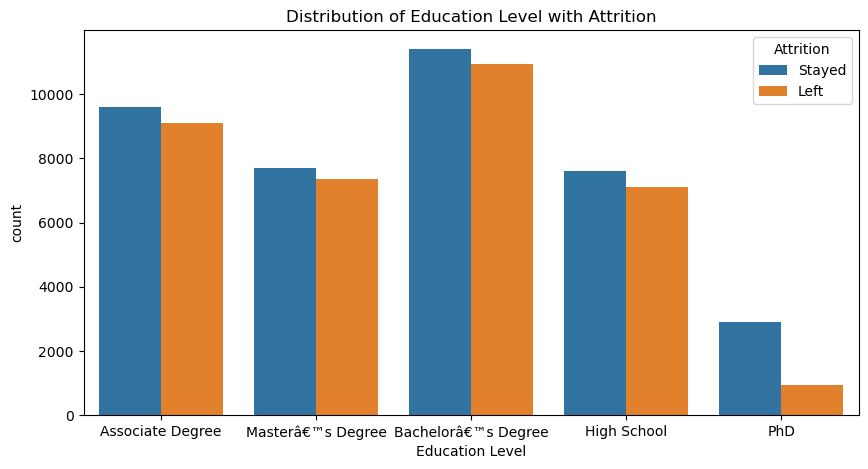

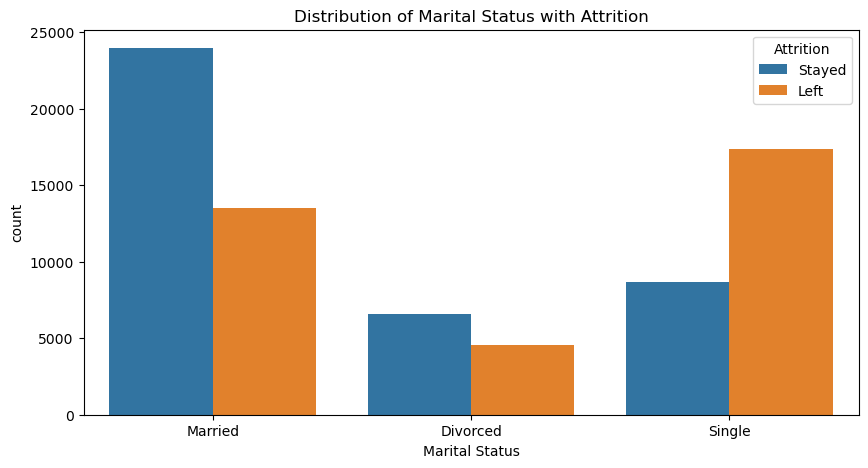

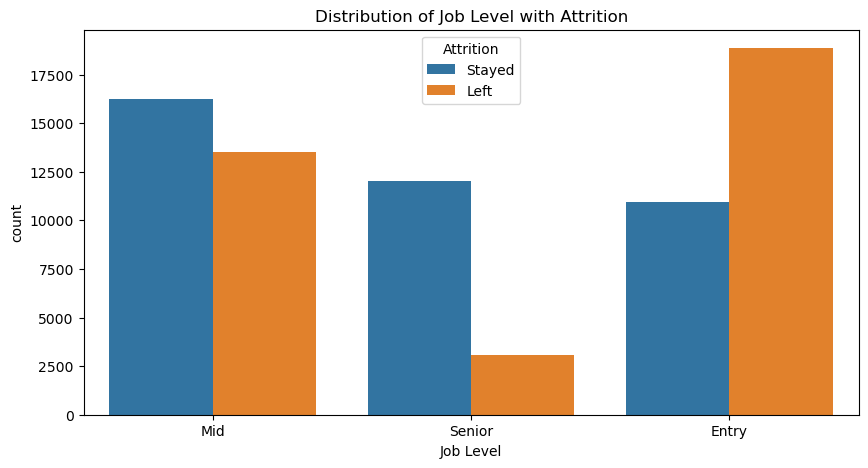

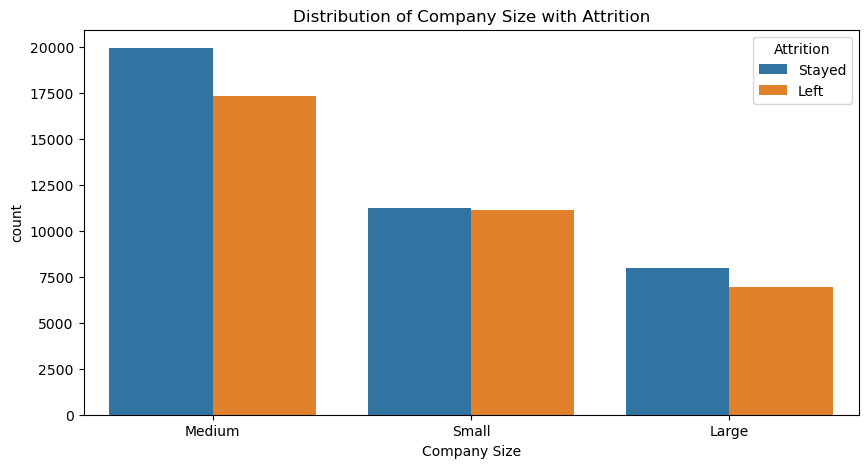

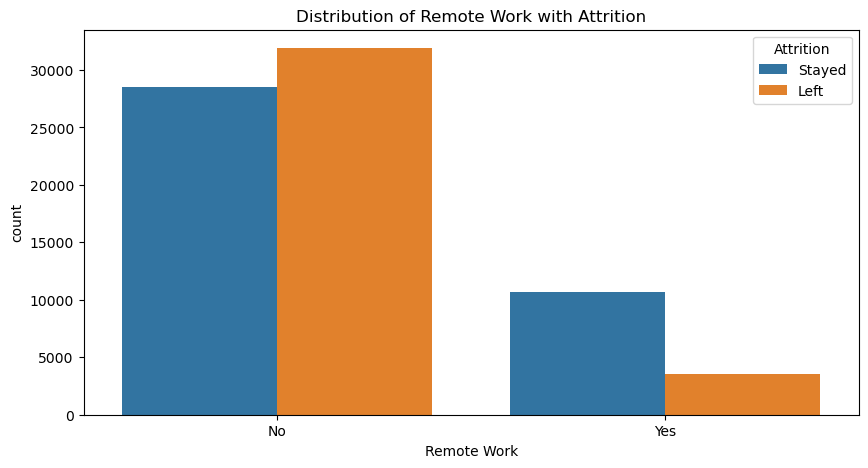

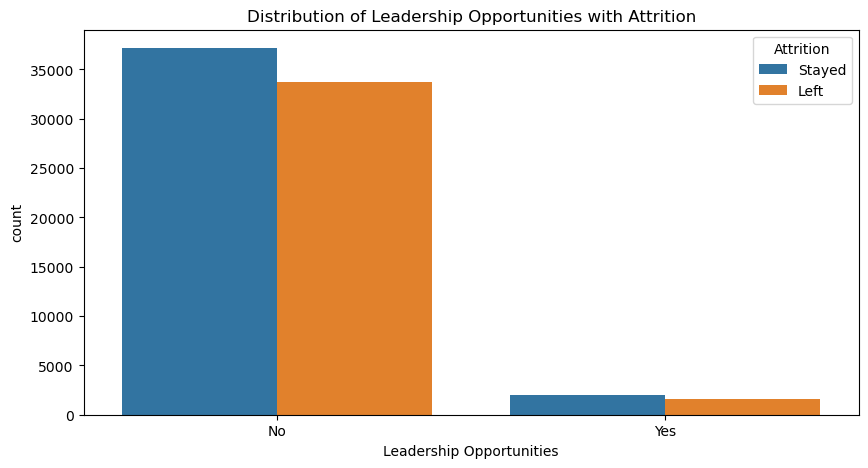

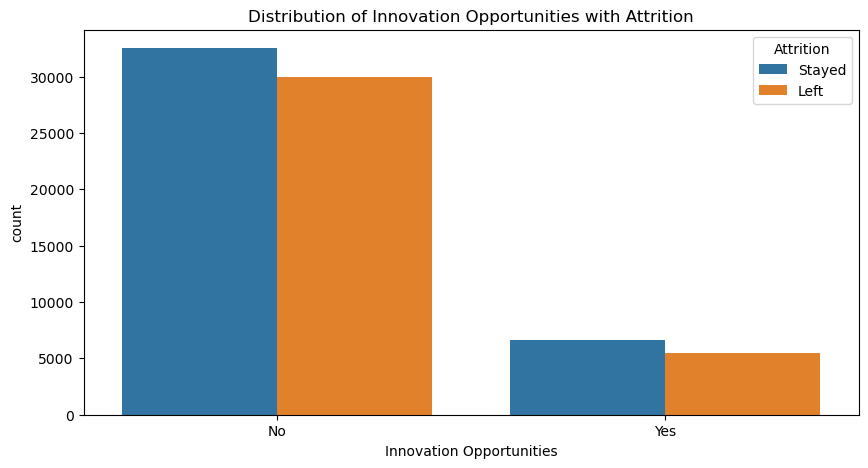

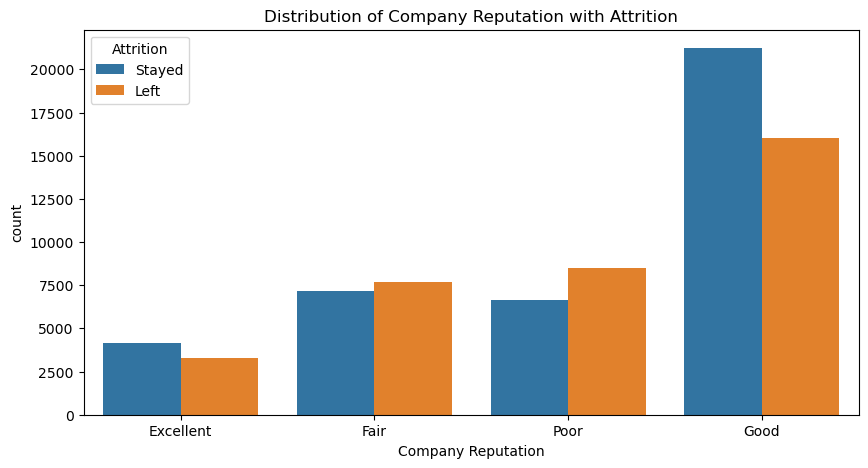

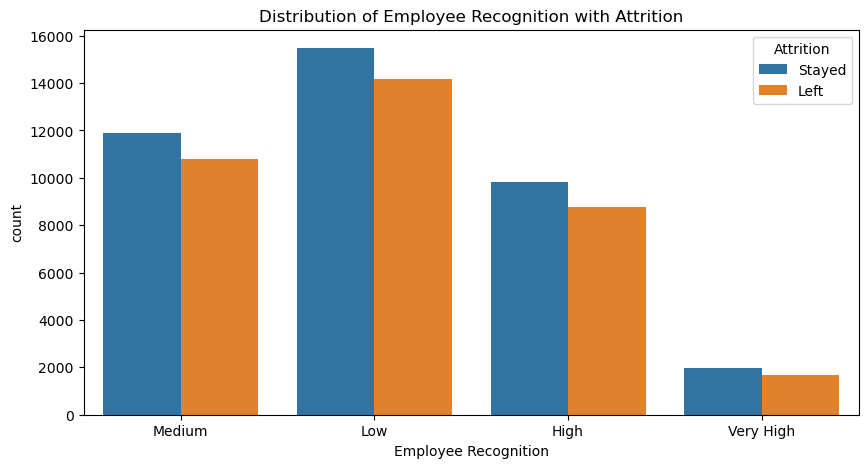

In [86]:
# Plot distribution for each categorical column with target variable
for column in val_X.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, hue='Attrition', data=df)
    plt.title(f'Distribution of {column} with Attrition')
    plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [90]:
# Check the categorical columns
categorical_columns = train_X.select_dtypes(include=['object']).columns
categorical_columns

Index(['Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [92]:
# Create dummy variables using the 'get_dummies' for independent columns

# Add the results to the master DataFrame
train_X_1 = pd.get_dummies(train_X, drop_first=True, dtype = int)
train_X_1

Age  Years at Company  Monthly Income  Number of Promotions  \
67016   23                 3            7050                     0   
9437    57                12            8429                     0   
52439   34                24            7338                     1   
32387   49                36           10099                     0   
62365   59                 2            6843                     0   
...    ...               ...             ...                   ...   
37194   32                13            8809                     2   
6265    45                16            9907                     0   
54886   28                 3            5238                     0   
860     39                 2            4814                     2   
15795   28                16           10304                     0   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
67016                95.0                     3                        13.0   
9437                 90.0                     4                        34.0   
52439                 2.0                     1                        93.0   
32387                 3.0                     1                        56.0   
62365                25.0                     3                        31.0   
...                   ...                   ...                         ...   
37194                21.0                     4                        26.0   
6265                  3.0                     1                        79.0   
54886                22.0                     1                         5.0   
860                  52.0                     2                        74.0   
15795                95.0                     3                        82.0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
67016                 0                    1               0  ...   
9437                  0                    1               0  ...   
52439                 0                    0               1  ...   
32387                 1                    0               0  ...   
62365                 0                    1               0  ...   
...                 ...                  ...             ...  ...   
37194                 0                    1               0  ...   
6265                  0                    0               0  ...   
54886                 0                    0               1  ...   
860                   1                    0               0  ...   
15795                 1                    0               0  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
67016                   0                0                             0   
9437                    0                0                             0   
52439                   0                1                             0   
32387                   0                0                             0   
62365                   0                1                             0   
...                   ...              ...                           ...   
37194                   0                0                             0   
6265                    1                1                             0   
54886                   0                0                             0   
860                     0                0                             1   
15795                   0                0                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
67016                             0                        0   
9437                              0                        0   
52439                             0                        0   
32387                             0                        0   
62365                             0                        0   
...                             ...                      ...   
37194                      

In [93]:
# Create dummy variables using the 'get_dummies' for independent columns

# It's already dropped in the function

Now, drop the original categorical columns and check the DataFrame

In [95]:
# Drop the original categorical columns and check the DataFrame
train_X_1.columns

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Medium',
       'Job Satisfaction_Very High', 'Performance Rating_Below Average',
       'Performance Rating_High', 'Performance Rating_Low', 'Overtime_Yes',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Education Level_PhD',
       'Marital Status_Married', 'Marital Status_Single', 'Job Level_Mid',
       'Job Level_Senior', 'Company Size_Medium', 'Company Size_Small',
       'Remote Work_Yes', 'Leadership Opportunities_Yes',
       'Innovation Opportunities_Yes', 'Company Reputation_Fair',
       'Company Reputation_Good', 'C

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [97]:
# Create dummy variables using the 'get_dummies' for independent columns

# Add the results to the master DataFrame
val_X_1 = pd.get_dummies(val_X, drop_first=True, dtype = int)
val_X_1.head(5)

Age  Years at Company  Monthly Income  Number of Promotions  \
71975   36                18            6199                     1   
20692   20                 9            7456                     1   
21753   47                33            4744                     0   
16382   49                35            8807                     0   
58800   58                48            7114                     1   

       Distance from Home  Number of Dependents  Company Tenure (In Months)  \
71975                50.0                     0                        54.0   
20692                84.0                     1                        16.0   
21753                84.0                     2                        40.0   
16382                79.0                     4                        53.0   
58800                54.0                     3                        78.0   

       Job Role_Finance  Job Role_Healthcare  Job Role_Media  ...  \
71975                 0                    0               1  ...   
20692                 0                    1               0  ...   
21753                 0                    0               0  ...   
16382                 0                    1               0  ...   
58800                 1                    0               0  ...   

       Company Size_Small  Remote Work_Yes  Leadership Opportunities_Yes  \
71975                   0                0                             0   
20692                   1                0                             0   
21753                   0                0                             0   
16382                   0                1                             0   
58800                   0                1                             0   

       Innovation Opportunities_Yes  Company Reputation_Fair  \
71975                             0                        0   
20692                             1                        0   
21753                             1                        0   
16382                             0                        0   
58800                             0                        0   

       Company Reputation_Good  Company Reputation_Poor  \
71975                        0                        1   
20692                        0                        0   
21753                        1                        0   
16382                        0                        0   
58800                        1                        0   

       Employee Recognition_Low  Employee Recognition_Medium  \
71975                         0                            0   
20692                         0                            0   
21753                         1                            0   
16382                         1                            0   
58800                         0                            1   

       Employee Recognition_Very High  
71975                               0  
20692                               0  
21753                               0  
16382                               0  
58800                               0  

[5 rows x 40 columns]

Now, drop the original categorical columns and check the DataFrame

In [99]:
# Drop categorical columns and check the DataFrame
# It's already dropped in the function

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [101]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(train_y)
y_train.head(5)

Attrition
67016      Left
9437     Stayed
52439    Stayed
32387      Left
62365    Stayed

In [102]:
y_validation = pd.DataFrame(val_y)
y_validation.head(5)

Attrition
71975      Left
20692    Stayed
21753    Stayed
16382    Stayed
58800    Stayed

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [104]:
# Create dummy variables using the 'get_dummies' for dependent column
y_train = pd.get_dummies(y_train, drop_first=True, dtype = int)
y_train.head(10)

Attrition_Stayed
67016                 0
9437                  1
52439                 1
32387                 0
62365                 1
71844                 1
8659                  0
29614                 0
46532                 0
11053                 1

In [105]:
y_train = y_train.squeeze().reset_index(drop=True)
y_train.head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
Name: Attrition_Stayed, dtype: int32

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [107]:
# Create dummy variables using the 'get_dummies' for dependent column
y_validation = pd.get_dummies(y_validation, drop_first=True, dtype = int)
y_validation.head(5)

Attrition_Stayed
71975                 0
20692                 1
21753                 1
16382                 1
58800                 1

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [109]:
# Drop redundant columns from both train and validation
# There is no such redundant column in the dataset

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [112]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [114]:
# Scale the numeric features present in the training set
numeric_cols = train_X.select_dtypes(include=[np.number]).columns.tolist()
train_X.loc[:, numeric_cols] = scaler.fit_transform(train_X.loc[:, numeric_cols])


# Scale the numerical features present in the validation set
val_X.loc[:, numeric_cols] = scaler.fit_transform(val_X.loc[:, numeric_cols])

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [118]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [120]:
from sklearn.feature_selection import RFE
# now wrap it in RFE
rfe = RFE(estimator=log_reg, n_features_to_select=15)
rfe.fit(train_X_1, train_y)

RFE(estimator=LogisticRegression(max_iter=1000, random_state=42),
    n_features_to_select=15)

In [121]:
# Display the features selected by RFE
selected_features = train_X_1.columns[rfe.support_]
selected_features

Index(['Work-Life Balance_Fair', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Performance Rating_Below Average', 'Performance Rating_Low',
       'Overtime_Yes', 'Education Level_PhD', 'Marital Status_Married',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Remote Work_Yes', 'Company Reputation_Fair',
       'Company Reputation_Poor'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [123]:
# Put columns selected by RFE into variable 'col'
col = selected_features

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [126]:
# Select only the columns selected by RFE
train_X_2 = train_X_1[col]

In [127]:
# View the training data
train_X_2.head(5)

Work-Life Balance_Fair  Work-Life Balance_Poor  Job Satisfaction_Low  \
67016                       1                       0                     0   
9437                        0                       0                     0   
52439                       1                       0                     0   
32387                       1                       0                     0   
62365                       0                       0                     0   

       Job Satisfaction_Very High  Performance Rating_Below Average  \
67016                           1                                 0   
9437                            0                                 0   
52439                           0                                 0   
32387                           0                                 0   
62365                           0                                 0   

       Performance Rating_Low  Overtime_Yes  Education Level_PhD  \
67016                       0             0                    0   
9437                        0             0                    0   
52439                       0             0                    0   
32387                       0             0                    0   
62365                       0             0                    0   

       Marital Status_Married  Marital Status_Single  Job Level_Mid  \
67016                       1                      0              1   
9437                        1                      0              1   
52439                       0                      1              0   
32387                       0                      1              0   
62365                       1                      0              1   

       Job Level_Senior  Remote Work_Yes  Company Reputation_Fair  \
67016                 0                0                        0   
9437                  0                0                        0   
52439                 1                1                        0   
32387                 0                0                        0   
62365                 0                1                        0   

       Company Reputation_Poor  
67016                        0  
9437                         1  
52439                        0  
32387                        0  
62365                        0

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [129]:
# Import statsmodels and add constant to training set
from statsmodels.tools import add_constant
X_train = add_constant(train_X_2)

In [130]:
X_train

const  Work-Life Balance_Fair  Work-Life Balance_Poor  \
67016    1.0                       1                       0   
9437     1.0                       0                       0   
52439    1.0                       1                       0   
32387    1.0                       1                       0   
62365    1.0                       0                       0   
...      ...                     ...                     ...   
37194    1.0                       1                       0   
6265     1.0                       0                       0   
54886    1.0                       0                       0   
860      1.0                       0                       0   
15795    1.0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
67016                     0                           1   
9437                      0                           0   
52439                     0                           0   
32387                     0                           0   
62365                     0                           0   
...                     ...                         ...   
37194                     0                           0   
6265                      0                           0   
54886                     0                           0   
860                       0                           0   
15795                     0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
67016                                 0                       0             0   
9437                                  0                       0             0   
52439                                 0                       0             0   
32387                                 0                       0             0   
62365                                 0                       0             0   
...                                 ...                     ...           ...   
37194                                 0                       0             0   
6265                                  0                       0             0   
54886                                 0                       1             0   
860                                   0                       0             0   
15795                                 1                       0             1   

       Education Level_PhD  Marital Status_Married  Marital Status_Single  \
67016                    0                       1                      0   
9437                     0                       1                      0   
52439                    0                       0                      1   
32387                    0                       0                      1   
62365                    0                       1                      0   
...                    ...                     ...                    ...   
37194                    0                       0                      1   
6265                     0                       0                      1   
54886                    0                       1                      0   
860                      0                       0                      1   
15795                    0                       0                      1   

       Job Level_Mid  Job Level_Senior  Remote Work_Yes  \
67016              1                 0                0   
9437               1                 0                0   
52439              0                 1                1   
32387              0                 0                0   
62365              1                 0                1   
...              ...               ...              ...   
37194              1                 0                0   
6265               0                 0                1   
54886              1                 0                0   
860                1                 0   

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [132]:
# Ensure both X and y have the same index
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# or better:
X, y = X.align(y, join='inner', axis=0)


In [152]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_train_const.index = y_train.index 
logit_model = sm.Logit(y_train, X_train_const).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.511379
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Attrition_Stayed   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.2607
Time:                        14:43:57   Log-Likelihood:                -26708.
converged:                       True   LL-Null:                       -36124.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.3660      0.034     10.66

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [154]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [156]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]

print(vif_data)

                             feature        VIF
0                              const  11.228341
1             Work-Life Balance_Fair   1.075932
2             Work-Life Balance_Poor   1.075929
3               Job Satisfaction_Low   1.028896
4         Job Satisfaction_Very High   1.029026
5   Performance Rating_Below Average   1.009580
6             Performance Rating_Low   1.009784
7                       Overtime_Yes   1.000374
8                Education Level_PhD   1.000241
9             Marital Status_Married   2.182330
10             Marital Status_Single   2.182304
11                     Job Level_Mid   1.201167
12                  Job Level_Senior   1.201040
13                   Remote Work_Yes   1.000396
14           Company Reputation_Fair   1.067900
15           Company Reputation_Poor   1.068015


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [158]:
# Predict the probabilities on the training set
y_train_pred_prob = logit_model.predict(X_train)
y_train_pred_prob.head(5)

67016    0.506711
9437     0.696192
52439    0.885906
32387    0.104034
62365    0.964638
dtype: float64

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [161]:
# Reshape it into an array
y_train_pred_prob = np.array(y_train_pred_prob).reshape(-1, 1)
y_train_pred_prob.shape

(52227, 1)

In [163]:
y_train_pred_prob

array([[0.50671056],
       [0.69619223],
       [0.88590578],
       ...,
       [0.73006846],
       [0.4631706 ],
       [0.14802729]])

In [165]:
y_train.head()

0    0
1    1
2    1
3    0
4    1
Name: Attrition_Stayed, dtype: int32

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [168]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
df_results = pd.DataFrame({
    'Actual': y_train.values.ravel(), # Attribution 0 (Stayed) or 1 (Left) 
    'Predicted_Prob': y_train_pred_prob.ravel() # Probabilities predicted by the model for the stayed flag
})

df_results.head()


Actual  Predicted_Prob
0       0        0.506711
1       1        0.696192
2       1        0.885906
3       0        0.104034
4       1        0.964638

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [171]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
df_results['Predicted'] = (df_results['Predicted_Prob'] > 0.5).astype(int)

df_results.head()

Actual  Predicted_Prob  Predicted
0       0        0.506711          1
1       1        0.696192          1
2       1        0.885906          1
3       0        0.104034          0
4       1        0.964638          1

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [175]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
train_accuracy = metrics.accuracy_score(df_results['Actual'], df_results['Predicted'])
print(f"Training Accuracy: {train_accuracy:.3f}")

Training Accuracy: 0.737


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

Confusion Matrix (Training Set):
[[17693  7006]
 [ 6749 20779]]


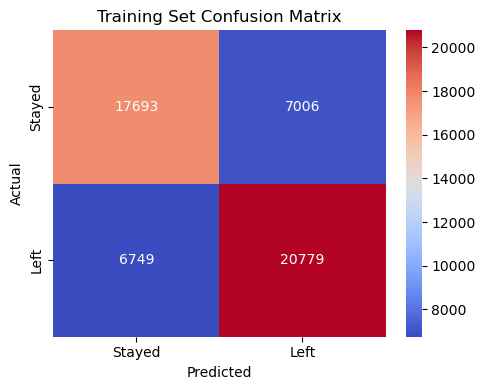

In [180]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(df_results['Actual'], df_results['Predicted'])

print("Confusion Matrix (Training Set):")
print(cm_train)

# Optional: visualize with a heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["Stayed","Left"], yticklabels=["Stayed","Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Training Set Confusion Matrix")
plt.tight_layout()
plt.show()

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [182]:
# Create variables for true positive, true negative, false positive and false negative
tn, fp, fn, tp = cm_train.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 17693
False Positives: 7006
False Negatives: 6749
True Positives: 20779


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [184]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)

print(f"Sensitivity (Recall): {sensitivity:.3f}")

Sensitivity (Recall): 0.755


In [186]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.3f}")

Specificity: 0.716


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [188]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.3f}")

Precision: 0.748


In [190]:
# Calculate recall
recall = sensitivity
print(f"Recall: {recall:.3f}")

Recall: 0.755


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [192]:
# Define ROC function
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_prob):
    """
    Plots ROC curve and returns
    fpr, tpr, thresholds.
    """
    # Compute false positive rate, true positive rate, thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    # Compute area under the curve
    auc_score = roc_auc_score(y_true, y_prob)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], "--", color="gray", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    return fpr, tpr, thresholds

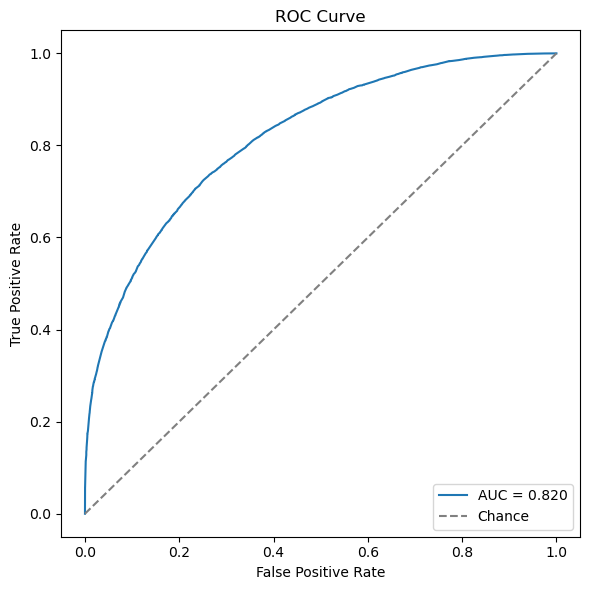

In [194]:
# Call the ROC function
X_val = add_constant(val_X_1[col])
y_val_pred_prob = logit_model.predict(X_val)
fpr, tpr, thresholds = plot_roc_curve(y_validation, y_val_pred_prob)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [196]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
from sklearn.metrics import confusion_matrix, accuracy_score

train_preds = X_train.copy()
cutoffs = np.arange(0.1, 1.0, 0.1)

for c in cutoffs:
    train_preds[f'pred_{c:.1f}'] = (y_train_pred_prob >= c).astype(int)

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [199]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
results = []
for c in cutoffs:
    preds = train_preds[f'pred_{c:.1f}']
    tn, fp, fn, tp = confusion_matrix(y_train, preds).ravel()
    results.append({
        'cutoff':      c,
        'accuracy':    accuracy_score(y_train, preds),
        'sensitivity': tp / (tp + fn) if (tp + fn) > 0 else np.nan,
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else np.nan
    })

metrics_df = pd.DataFrame(results)
metrics_df


cutoff  accuracy  sensitivity  specificity
0     0.1  0.582055     0.995532     0.121219
1     0.2  0.659850     0.962656     0.322361
2     0.3  0.702836     0.907549     0.474675
3     0.4  0.729776     0.834096     0.613507
4     0.5  0.736630     0.754831     0.716345
5     0.6  0.728684     0.649884     0.816511
6     0.7  0.700040     0.523176     0.897162
7     0.8  0.650583     0.376235     0.956355
8     0.9  0.582974     0.215453     0.992591

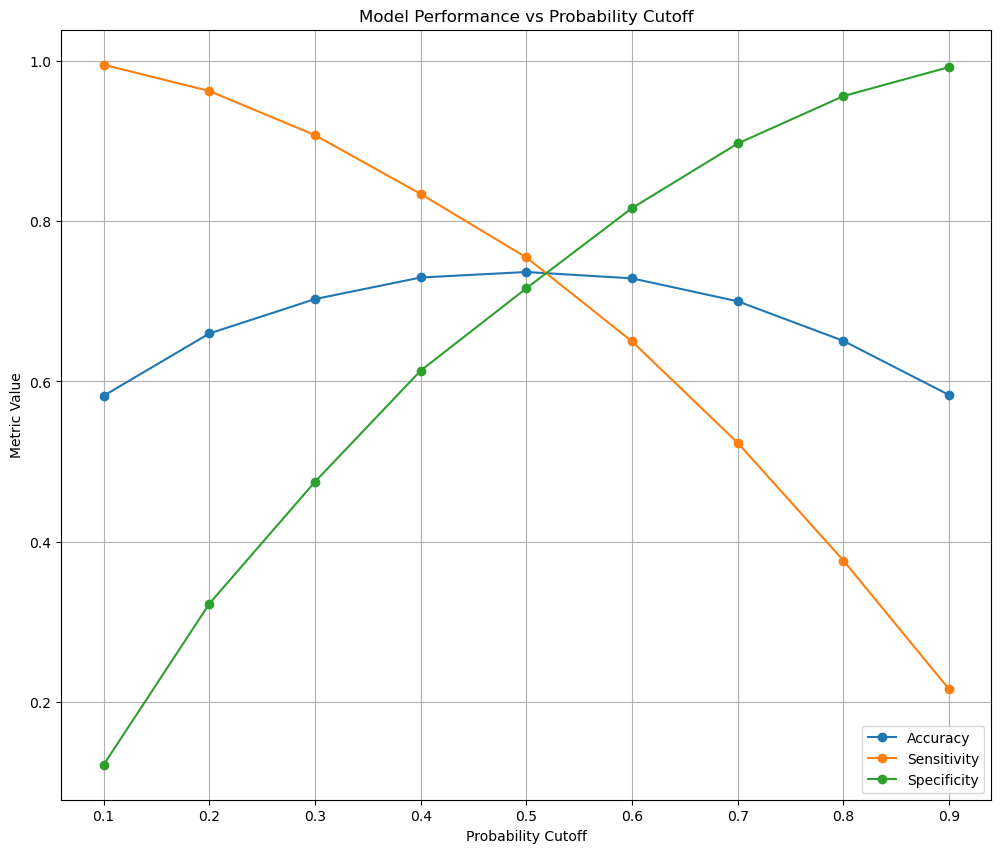

In [201]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs

plt.figure(figsize=(12,10))
plt.plot(metrics_df['cutoff'], metrics_df['accuracy'],    marker='o', label='Accuracy')
plt.plot(metrics_df['cutoff'], metrics_df['sensitivity'], marker='o', label='Sensitivity')
plt.plot(metrics_df['cutoff'], metrics_df['specificity'], marker='o', label='Specificity')

plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Model Performance vs Probability Cutoff')
plt.legend()
plt.grid(True)
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [204]:
# Create a column for final prediction based on the optimal cutoff

optimal_cutoff = 0.5
train_preds['final_pred'] = (y_train_pred_prob >= optimal_cutoff).astype(int)
train_preds.head()

const  Work-Life Balance_Fair  Work-Life Balance_Poor  \
67016    1.0                       1                       0   
9437     1.0                       0                       0   
52439    1.0                       1                       0   
32387    1.0                       1                       0   
62365    1.0                       0                       0   

       Job Satisfaction_Low  Job Satisfaction_Very High  \
67016                     0                           1   
9437                      0                           0   
52439                     0                           0   
32387                     0                           0   
62365                     0                           0   

       Performance Rating_Below Average  Performance Rating_Low  Overtime_Yes  \
67016                                 0                       0             0   
9437                                  0                       0             0   
52439                                 0                       0             0   
32387                                 0                       0             0   
62365                                 0                       0             0   

       Education Level_PhD  Marital Status_Married  ...  pred_0.1  pred_0.2  \
67016                    0                       1  ...         1         1   
9437                     0                       1  ...         1         1   
52439                    0                       0  ...         1         1   
32387                    0                       0  ...         1         0   
62365                    0                       1  ...         1         1   

       pred_0.3  pred_0.4  pred_0.5  pred_0.6  pred_0.7  pred_0.8  pred_0.9  \
67016         1         1         1         0         0         0         0   
9437          1         1         1         1         0         0         0   
52439         1         1         1         1         1         1         0   
32387         0         0         0         0         0         0         0   
62365         1         1         1         1         1         1         1   

       final_pred  
67016           1  
9437            1  
52439           1  
32387           0  
62365           1  

[5 rows x 26 columns]

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [207]:
# Calculate the accuracy
final_train_accuracy = accuracy_score(y_train, train_preds['final_pred'])
print(f"Final training accuracy @ cutoff {optimal_cutoff:.2f}: {final_train_accuracy:.3f}")

Final training accuracy @ cutoff 0.50: 0.737


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [210]:
# Create the confusion matrix once again
cm_final = confusion_matrix(y_train, train_preds['final_pred'])
print("Final Confusion Matrix:\n", cm_final)

Final Confusion Matrix:
 [[17693  7006]
 [ 6749 20779]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [213]:
# Create variables for true positive, true negative, false positive and false negative
tn_final, fp_final, fn_final, tp_final = cm_final.ravel()

print("True Negatives: ", tn_final)
print("False Positives:", fp_final)
print("False Negatives:", fn_final)
print("True Positives: ", tp_final)

True Negatives:  17693
False Positives: 7006
False Negatives: 6749
True Positives:  20779


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [216]:
# Calculate Sensitivity
tn_final, fp_final, fn_final, tp_final = confusion_matrix(
    y_train, train_preds['final_pred']
).ravel()

# Sensitivity (Recall of “Left” class)
sensitivity_final = tp_final / (tp_final + fn_final)

print(f"Sensitivity (Recall): {sensitivity_final:.3f}")

Sensitivity (Recall): 0.755


In [218]:
# Calculate Specificity
specificity_final = tn_final / (tn_final + fp_final)
print(f"Specificity:  {specificity_final:.3f}")

Specificity:  0.716


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [221]:
# Calculate Precision
from sklearn.metrics import precision_score, recall_score

precision_final = precision_score(y_train, train_preds['final_pred'])
print(f"Precision: {precision_final:.3f}")


Precision: 0.748


In [223]:
# Calculate Recall
recall_final = recall_score(y_train, train_preds['final_pred'])   
print(f"Recall: {recall_final:.3f}")

Recall: 0.755


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [226]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve, average_precision_score

In [228]:
# Check actual and predicted values from initial model
comparison_df = pd.DataFrame({
    'Actual': y_train.values.ravel(), # Attribution 0 (Stayed) or 1 (Left) 
    'Predicted_Prob': y_train_pred_prob.ravel() # Probabilities predicted by the model for the stayed flag
})
comparison_df['Predicted'] = (comparison_df['Predicted_Prob'] > 0.5).astype(int)
comparison_df = comparison_df[['Actual', 'Predicted']]
comparison_df.head(20)


Actual  Predicted
0        0          1
1        1          1
2        1          1
3        0          0
4        1          1
5        1          1
6        0          1
7        0          0
8        0          0
9        1          1
10       1          0
11       1          1
12       0          1
13       1          1
14       1          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

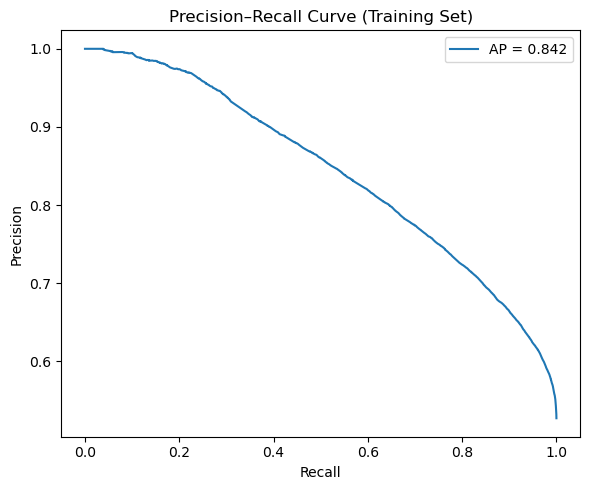

In [231]:
# Plot precision-recall curve
prec, rec, pr_thresholds = precision_recall_curve(y_train, y_train_pred_prob)
avg_prec = average_precision_score(y_train, y_train_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"AP = {avg_prec:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Training Set)")
plt.legend()
plt.tight_layout()
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [236]:
# Select the relevant features for validation set
X_val_rfe = X_val[col]   

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [239]:
# Add constant to X_validation
X_validation = sm.add_constant(X_val_rfe).astype(float)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [242]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = logit_model.predict(X_validation)      # array of probabilities

# View predictions
print(y_validation_pred[:5])

71975    0.321110
20692    0.957577
21753    0.724194
16382    0.904379
58800    0.844300
dtype: float64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [245]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame({
    "Predicted_Prob": y_validation_pred     
})


# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame({
    "Actual": y_validation.values.ravel() 
})

# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)
df_validation = pd.concat([actual, predicted_probability], axis=1)
df_validation.head(5)

Actual  Predicted_Prob
0       0        0.321110
1       1        0.957577
2       1        0.724194
3       1        0.904379
4       1        0.844300

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [248]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
df_validation['final_prediction'] = (
    df_validation['Predicted_Prob'] >= optimal_cutoff
).astype(int)

# Check the DataFrame
df_validation.head()

Actual  Predicted_Prob  final_prediction
0       0        0.321110                 0
1       1        0.957577                 1
2       1        0.724194                 1
3       1        0.904379                 1
4       1        0.844300                 1

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [251]:
# Calculate the overall accuracy
val_accuracy = accuracy_score(y_validation, df_validation['final_prediction'])
val_accuracy

0.7344413170709914

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [254]:
# Create confusion matrix
cm_val = confusion_matrix(y_validation, df_validation['final_prediction'])
print("Validation Confusion Matrix:\n", cm_val)

Validation Confusion Matrix:
 [[7635 3085]
 [2859 8804]]


In [256]:
# Create variables for true positive, true negative, false positive and false negative
tn_val, fp_val, fn_val, tp_val = cm_val.ravel()

print(f"True Negatives : {tn_val}")
print(f"False Positives: {fp_val}")
print(f"False Negatives: {fn_val}")
print(f"True Positives : {tp_val}")

True Negatives : 7635
False Positives: 3085
False Negatives: 2859
True Positives : 8804


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [259]:
# Calculate sensitivity
sensitivity_val = tp_val / (tp_val + fn_val)
print(f"Sensitivity (Recall): {sensitivity_val:.3f}")


Sensitivity (Recall): 0.755


In [261]:
# Calculate specificity
specificity_val = tn_val / (tn_val + fp_val)
print(f"Specificity: {specificity_val:.3f}")

Specificity: 0.712


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [263]:
# Calculate precision
precision_val = precision_score(y_validation, df_validation['final_prediction'])
print(f"Precision: {precision_val:.3f}")

Precision: 0.741


In [264]:
# Calculate recall
recall_val = recall_score(y_validation, df_validation['final_prediction'])   # same as sensitivity_val
print(f"Recall: {recall_val:.3f}")

Recall: 0.755


## Conclusion

